# Student Performance Indicator

<b> Machine Learning Project Life cycle 
    
  * Understanding the Problem Statement
  * Data Collection
  * Data Checks to perform
  * Exploratory data analysis
  * Data Pre-Processing
  * Model Training
  * Choose best model

## 1. Problem Statement

  * The objective of this project is to investigate the influence of different factors, such as Gender, Ethnicity, Parental         level of education, Lunch, and Test preparation course, on the academic performance of students, specifically their test         scores.

## 2. Data Collection

  * Dataset Source -https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
  * The data consist of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')

#### Show top5 Records

In [5]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing _score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Show bottom5 Records

In [6]:
df.tail()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing _score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


#### Shape of the dataset

In [7]:
df.shape

(1000, 8)

### 2.2 Dataset Information

* gender :sex of students-> (Male/Female)
* race/ethnicity :ethnicity of students-> (Group A,B,C,D,E)
* parental level of education :parents final education->(vachelor's degree,some college, master's degree,high school)
* lunch :having lunch before test(standard of free/reduced)
* math score
* reading score
* writing score

## 3.Data check to perfrom

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

### 3.1 Check Missing Values

In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing _score                 0
dtype: int64

#### There are no missing values

### 3.2 Check Duplicates

In [9]:
df.duplicated().sum()

0

#### There are no duplicates

### 3.3 Check data types

In [10]:
df.info() #checking null and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing _score               1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing _score                 77
dtype: int64

### 3.5 Check Statistics of dataset

In [12]:
df.describe()

,math_score,reading_score,writing _score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights

 * From above description of numerical data, all means are very close to each other - between 66 and 68.05;
 * The standard deviations of the data are also relatively similar, ranging from 14.6 to 15.19, suggesting a comparable degree      of variability in the performance metrics;
 * Notably, the minimum score for math is 0, whereas for writing and reading, the minimum scores are considerably higher at 10      and 17.

### 3.7 Exploring Data

In [13]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing _score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
print("Categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:  ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:  ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:   ['none' 'completed']


In [15]:
# define numerical & categorical column

numeric_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

# print column

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing _score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [16]:
df.head(3)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing _score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


### 3.8 Adding Columns for "Total Score" and "Average"

In [17]:
df['total score']=df['math_score']+ df['reading_score']+df['writing _score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing _score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full= df[df['reading_score']== 100]['average'].count()
writing_full=df[df['writing _score']== 100]['average'].count()
math_full =df[df['math_score']==100]['average'].count()


print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [19]:
reading_less_20 = df[df['reading_score'] <=20]['average'].count()
writing_less_20 =df[df['writing _score']<=20]['average'].count()
math_less_20 = df[df['math_score']<=20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing:{writing_less_20}')
print(f'Number of students with less than 20 marks in Reading:{reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing:3
Number of students with less than 20 marks in Reading:1


#### Insights

 * From above values we analyise that students perfromed worst in Maths
 * Best performance in reading section

## 4. Exploring Data (Visualization)

### 4.1 To draw conclusions from the data, it would be helpful to visualize the distribution of average scores.

 * Histogram
 * Kernel Distribution Function(KDE)

### 4.1.1 Histogram & KDE

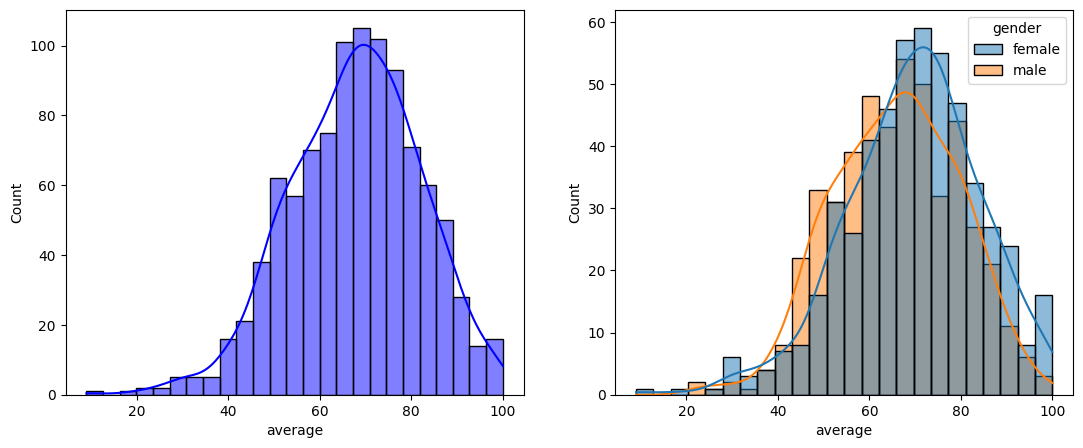

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(13,5))
plt.subplot(121)
sns.histplot(data=df,x='average', bins=25, kde=True,color='blue')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

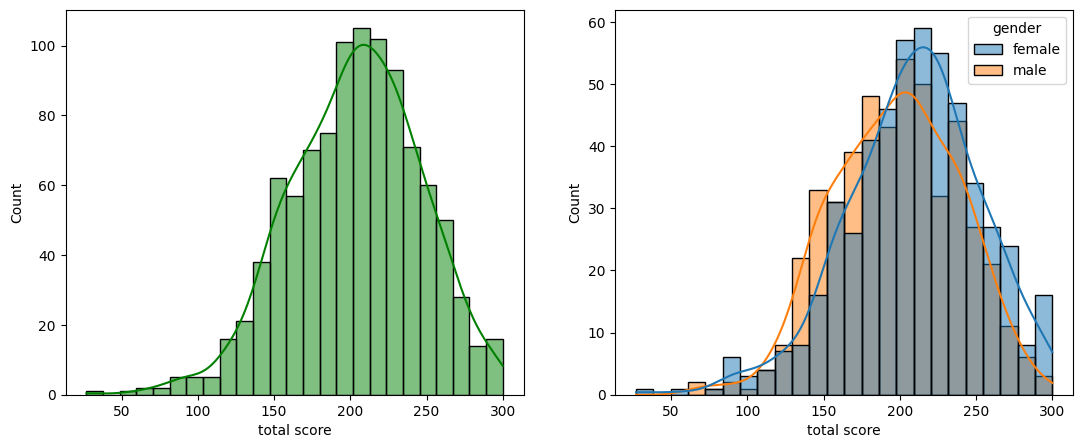

In [21]:
fig, axs=plt.subplots(1,2 ,figsize=(13,5))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=25,kde=True,color='green')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

#### Insights

 * On average, female students tend to outperform male students.

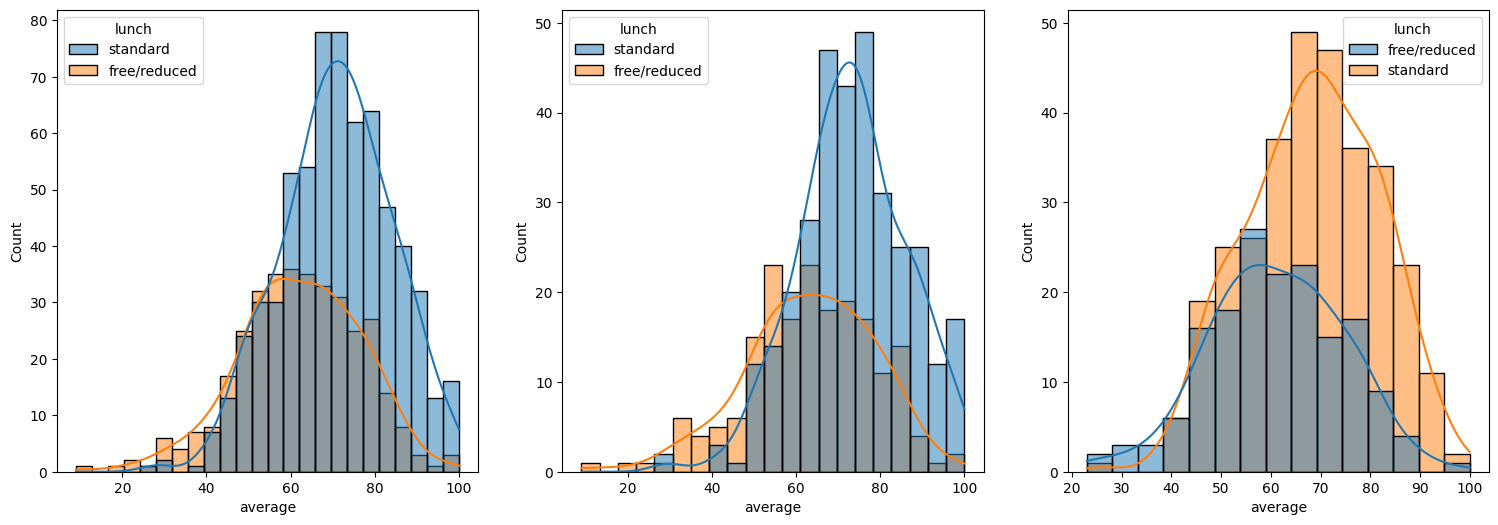

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#### Insights

 * Students who receive standard lunch tend to perform better on exams.
 * Regardless of gender, students who receive standard lunch tend to perform better on exams.

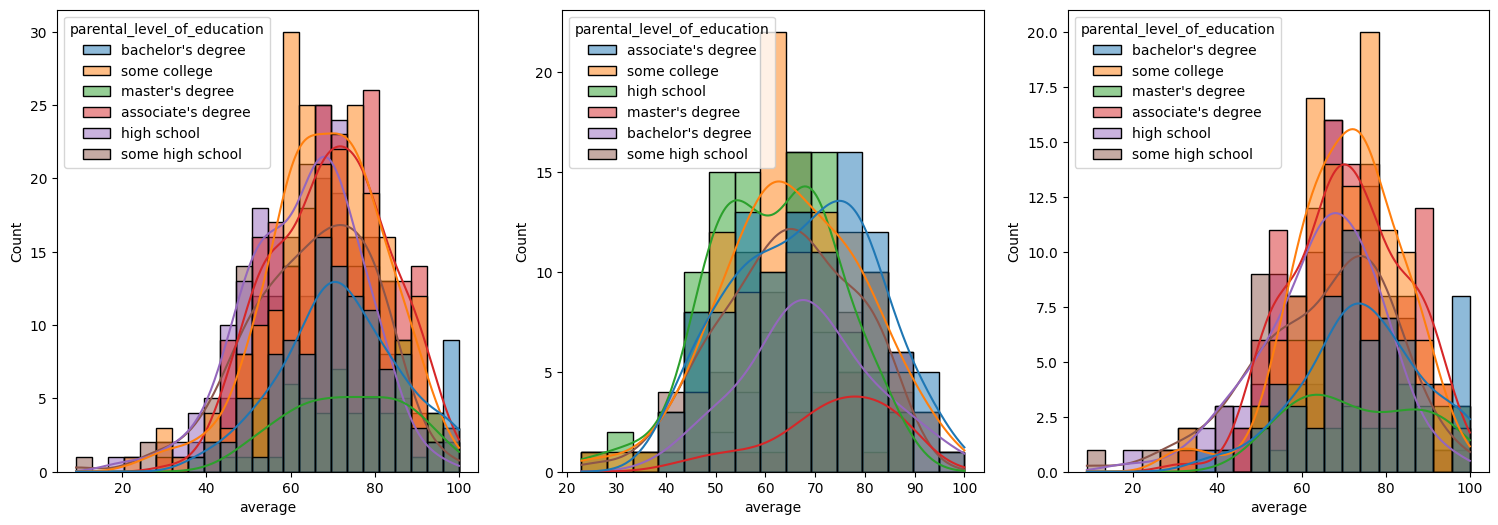

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()


#### Insights

 * On the whole, there is no strong correlation between parents' education and students' exam performance.
 * According to the second plot, male students whose parents have associate's or master's degrees tend to perform better on        exams.
 * The third plot indicates that parents' education level has no significant impact on the exam performance of female students.

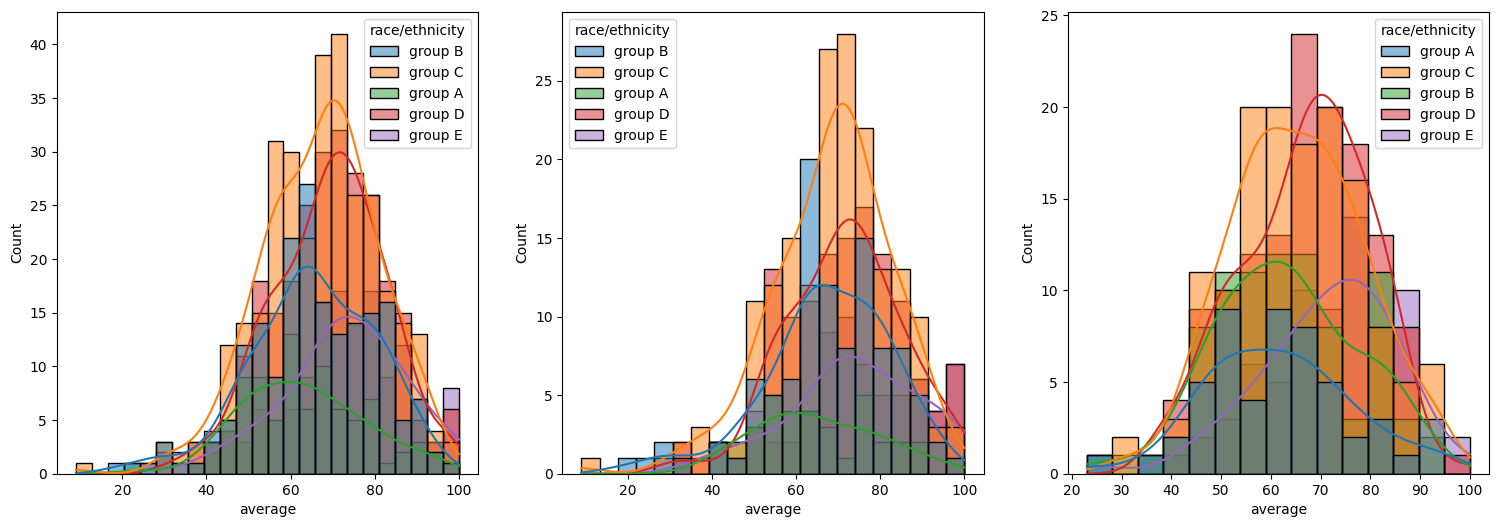

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

#### Insights

 * Both male and female students in groups A and B tend to perform poorly on exams.
 * Irrespective of gender, students belonging to groups A and B tend to exhibit poor performance on exams.

### 4.2 Maximum score of students in all three subjects

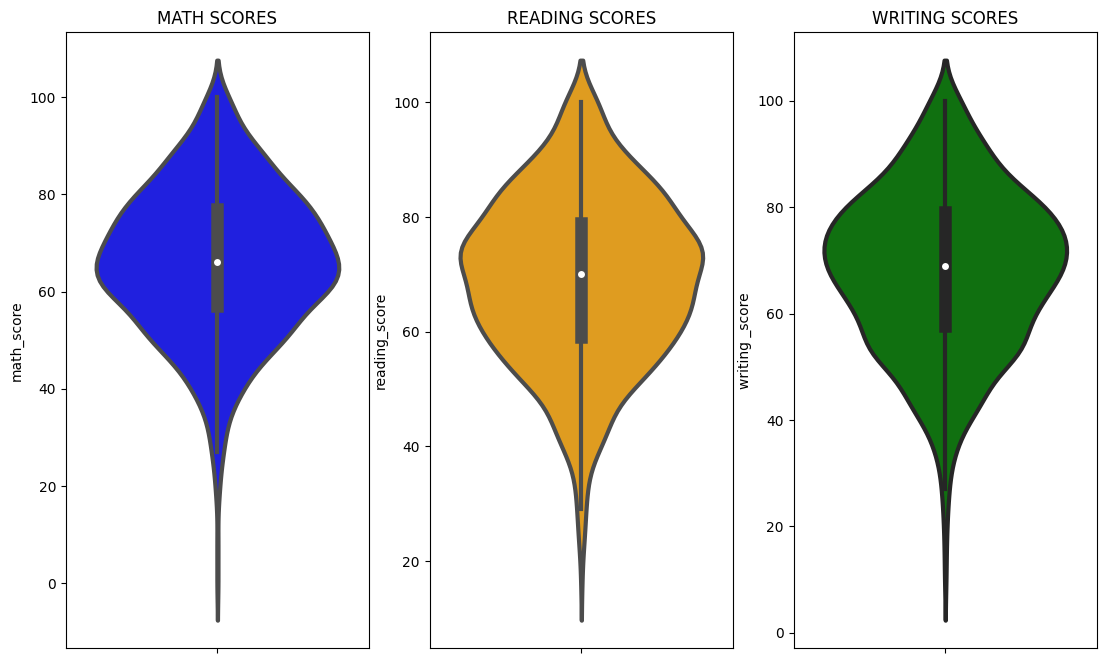

In [25]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df,color='blue',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='orange',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing _score',data=df,color='green',linewidth=3)
plt.show()

#### Insights

 * Based on the three plots, it is evident that a majority of the students score between 60-80 in Math, while for Reading and      Writing, the majority of scores fall between 50-80.

### 4.3 Multivariant analysis using Pieplot

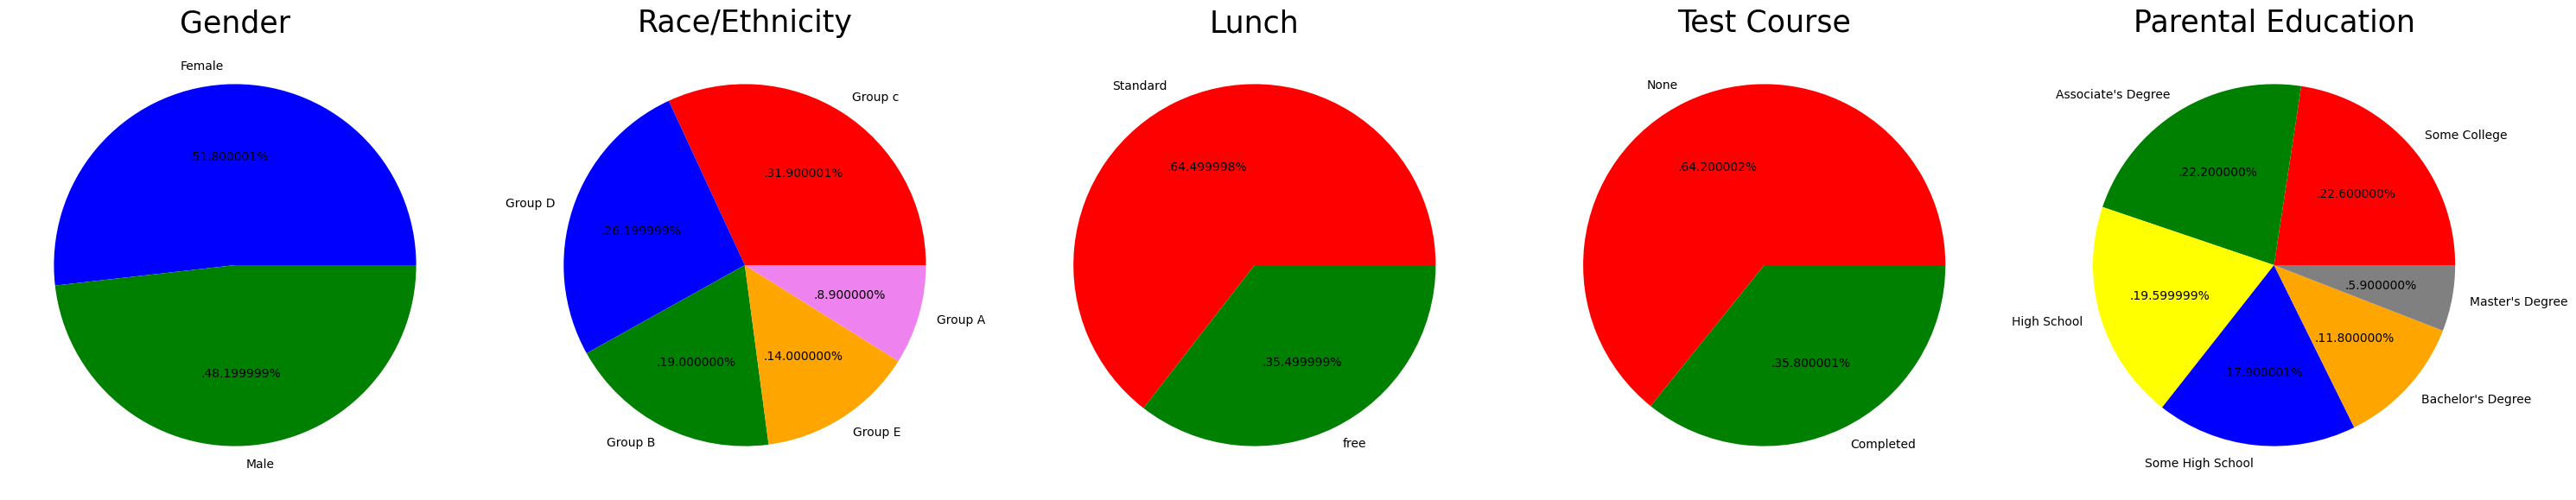

In [26]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['blue','green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender',fontsize =25)
plt.axis('off')

plt.subplot(1,5,2)
size= df['race/ethnicity'].value_counts()
labels = 'Group c','Group D','Group B','Group E','Group A'
color = ['red','blue','green','orange','violet']

plt.pie(size, colors=color, labels = labels, autopct= '.%2f%%')
plt.title('Race/Ethnicity',fontsize=25)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard','free'
color= ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Lunch',fontsize=25)
plt.axis('off')

plt.subplot(1,5,4)
size= df['test_preparation_course'].value_counts()
labels = 'None','Completed'
color = ['red','green']

plt.pie(size, colors=color, labels=labels,autopct='.%2f%%')
plt.title('Test Course', fontsize=25)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College',"Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color=['red','green','yellow','blue','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct='.%2F%%')
plt.title('Parental Education', fontsize=25)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()


#### Insights

 * The number of male and female students is nearly equal.
 * Group C has the highest number of students.
 * The majority of students have standard lunch.
 * A larger number of students have not enrolled in any test preparation course.
 * The highest number of students have parental education level of "Some College", followed closely by "Associate's Degree".

### 4.4 Feature wise visualization

### 4.1.1 Gender Column

 * What is the distribution of Gender among the students?
 * Does Gender have an impact on student performance?

### Univariate analysis (What is the distribution of Gender among the students?)

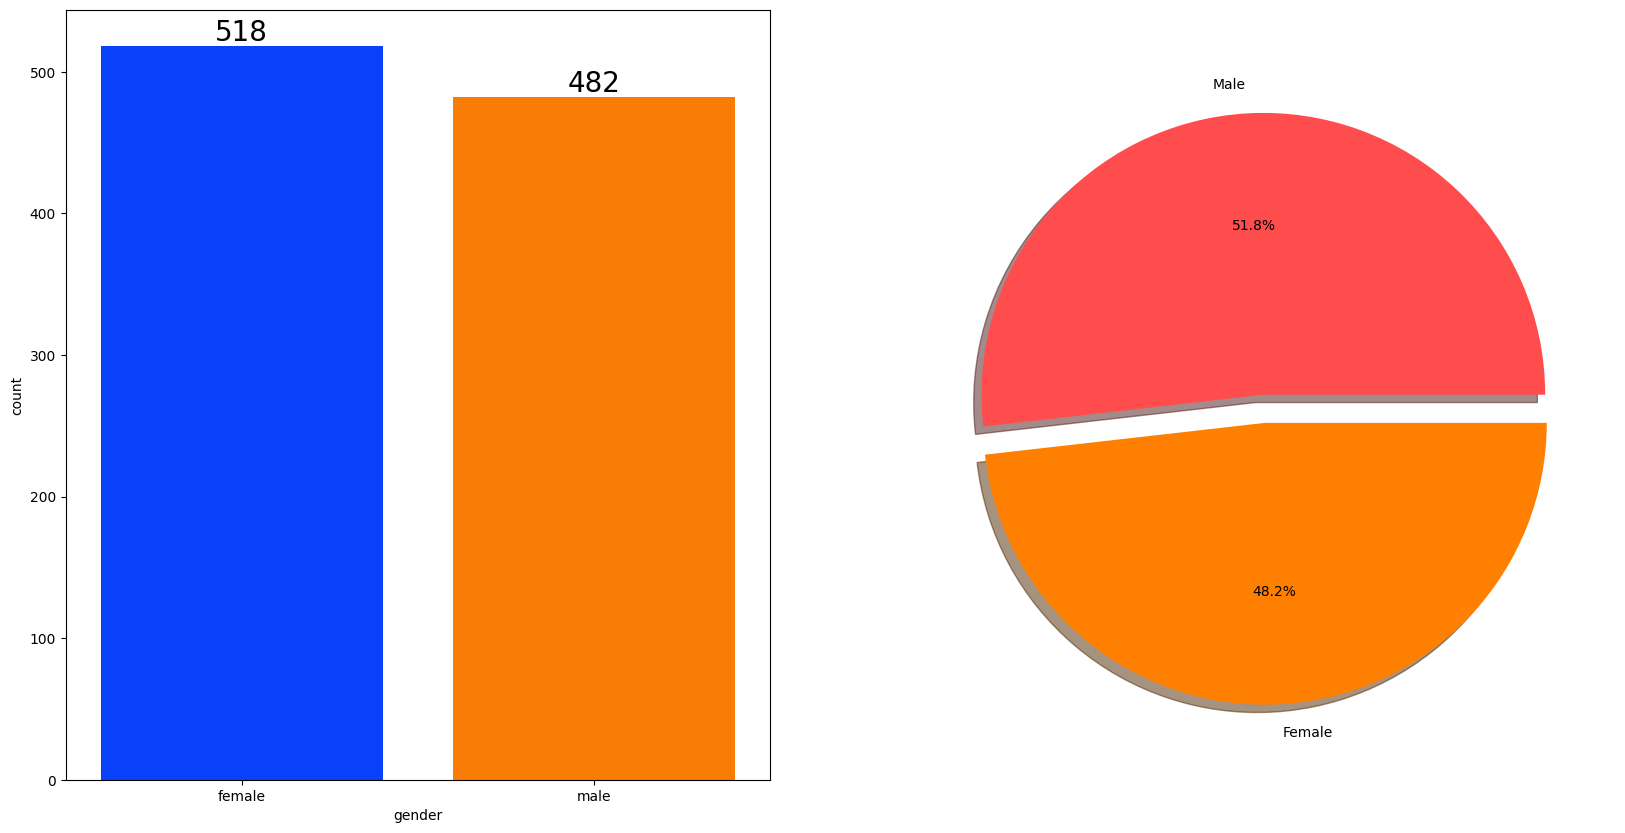

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights
 * The gender distribution of students is nearly balanced, with 518 female students (48%) and 482 male students (52%).

### Bivariate Analysis (Does Gender have an impact on student performance?)

In [29]:
gender_group = df.groupby('gender').sum()
gender_group

,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing _score,total score,average
gender,,,,,,,,,
female,group Bgroup Cgroup Bgroup Bgroup Bgroup Bgrou...,bachelor's degreesome collegemaster's degreeas...,standardstandardstandardstandardstandardfree/r...,nonecompletednonenonecompletednonenonenonenone...,32962,37611,37538,108111,36037.000000
male,group Agroup Cgroup Bgroup Dgroup Cgroup Dgrou...,associate's degreesome collegesome collegehigh...,free/reducedstandardfree/reducedfree/reducedst...,nonenonenonecompletednonenonecompletednonecomp...,33127,31558,30516,95201,31733.666667


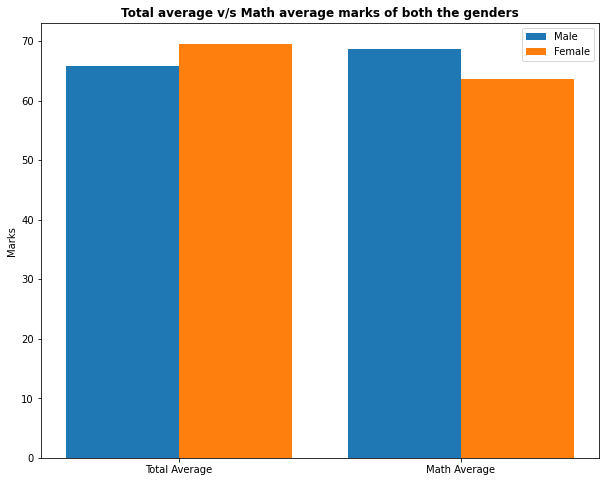

In [ ]:
plt.figure(figsize=(10,8))

X = ['Total Average','Math Average']

female_scores= [gender_group['average'][0],gender_group['math_score'][0]]
male_scores = [gender_group['average'][1],gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label ='Male')
plt.bar(X_axis + 0.2, female_scores,0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights

 * On average, female students tend to have a higher overall score than male students.
 * However, male students tend to perform better in Math compared to female students.

### 4.4.2 RACE/ETHNICITY COLUMN

 * What is the distribution of students across the different groups?
 * Does Race/Ethnicity have an impact on student performance?

### Univariate Analysis (What is the distribution of students across the different groups?)

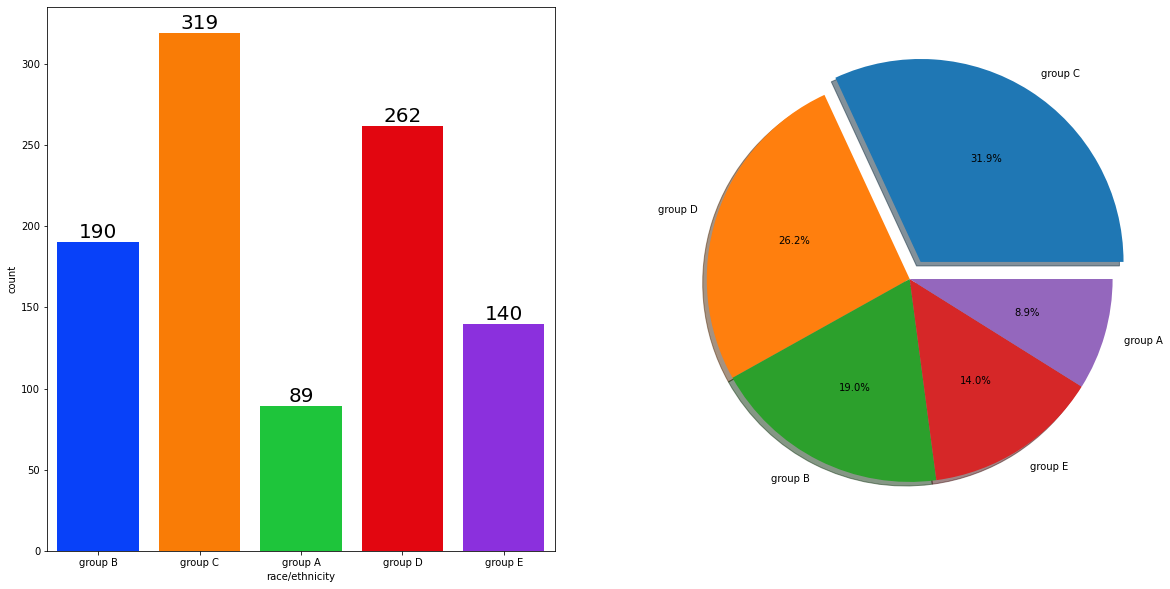

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights

 * The majority of students belong to either Group C or Group D.
 * The smallest number of students belong to Group A.

### Bivariate Analysis (Does Race/Ethnicity have an impact on student performance?)

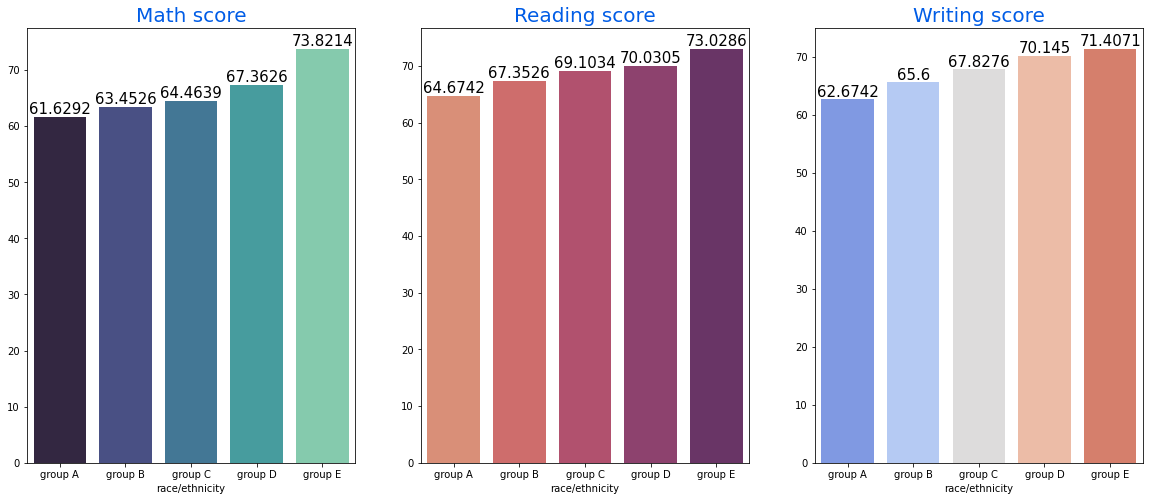

In [ ]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)
    
sns.barplot(x=Group_data2['writing _score'].mean().index,y=Group_data2['writing _score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights

 * Group E students have achieved the highest marks on average.
 * Group A students have obtained the lowest marks on average.
 * Students from a lower Socioeconomic status tend to have a lower average score in all subjects.

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

 * What is the educational background of the students' parents?
 * Does parental education have an impact on students' performance?

### Univariate Analysis (What is the educational background of the students' parents?)

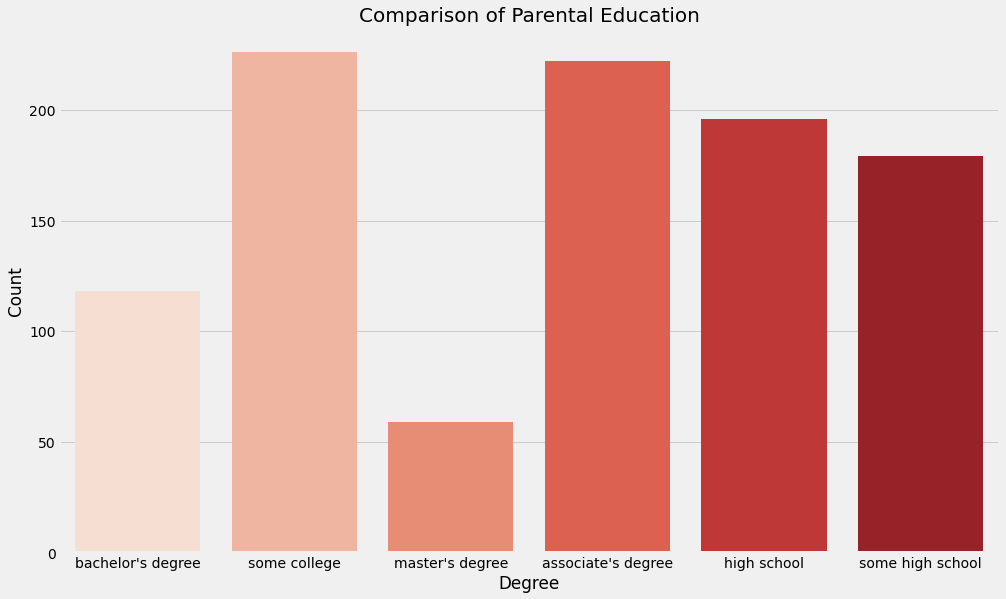

In [ ]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'],palette='Reds')
plt.title('Comparison of Parental Education',fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

#### Insight

 * The highest number of parents have completed their education at the "Some College" level.

### Bivariate Analysis (Does parental education have an impact on students' performance?)

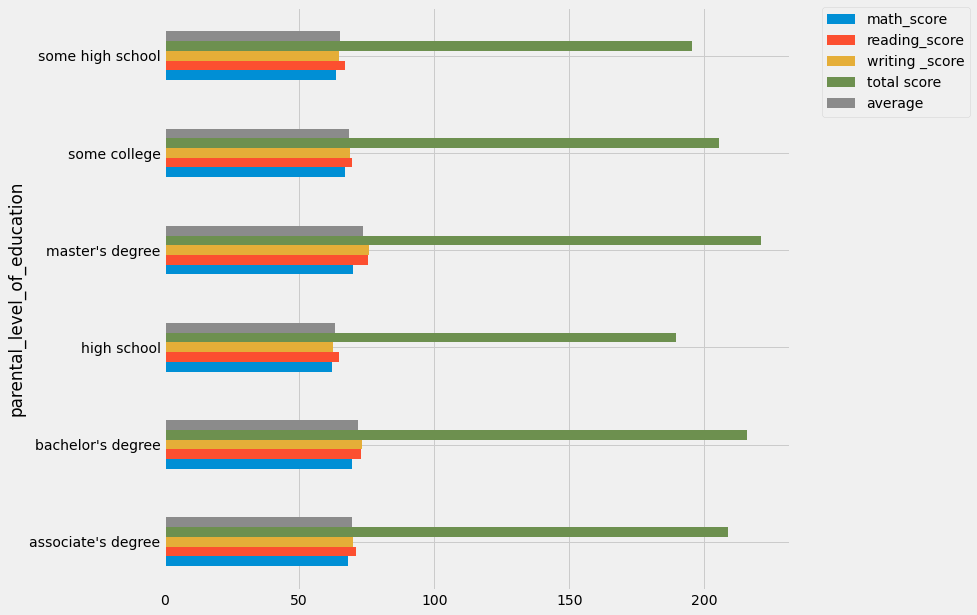

In [ ]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

#### Insight

 * Students whose parents have completed education at the master's and bachelor's level tend to score higher than students whose    parents have completed education at other levels.

### 4.4.4 LUNCH COLUMN

 * What is the most common type of lunch among students?
 * Does the type of lunch have an effect on test results?

### Univariate Analysis (What is the most common type of lunch among students?)

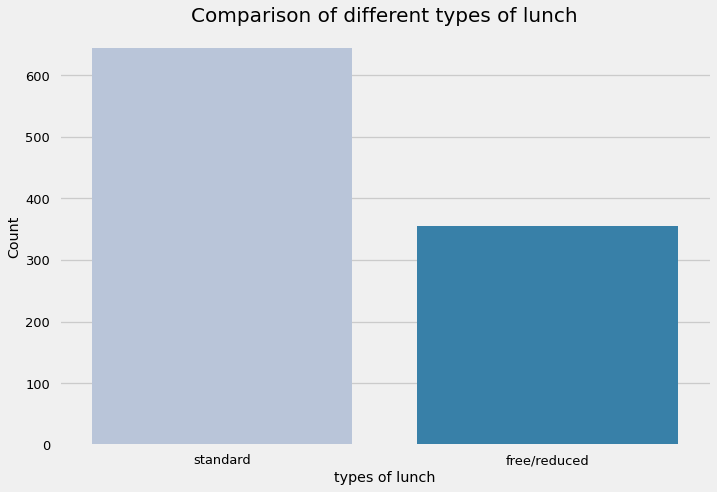

In [ ]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'],palette='PuBu')
plt.title('Comparison of different types of lunch',fontweight=30,fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('Count')
plt.show()

#### Insight

 * The number of students receiving standard lunch was higher than the number of students receiving free lunch.

### Bivariate Analysis (Does the type of lunch have an effect on test results?)

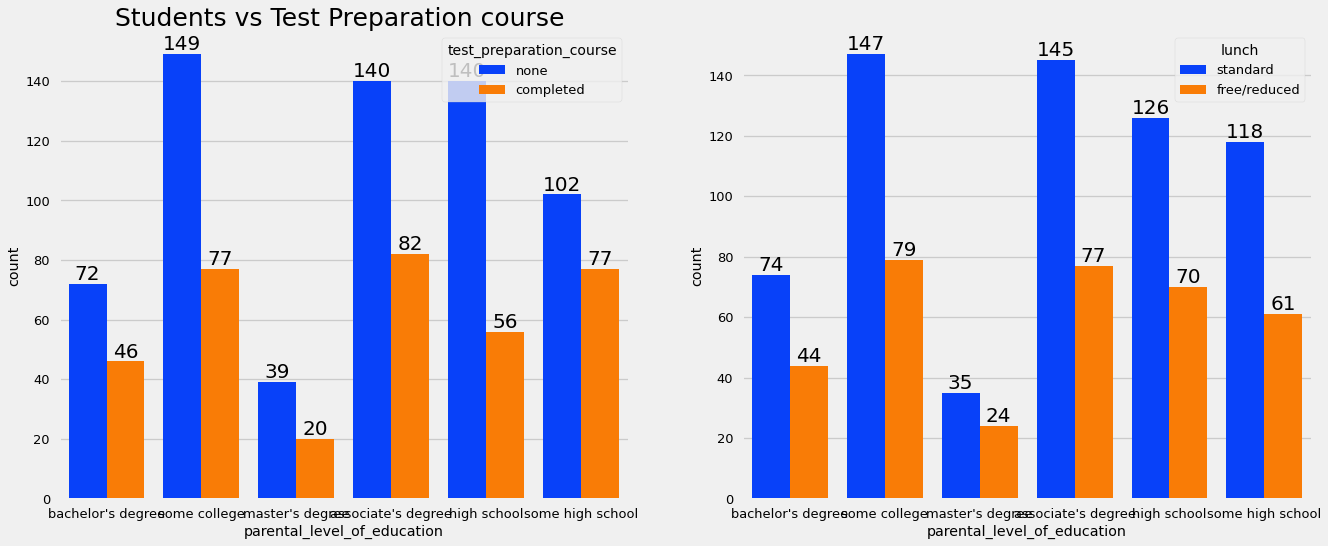

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs Test Preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights

 * Students who receive standard lunch tend to perform better on tests than students who receive free/reduced lunch.

### 4.4.5 TEST PREPARATION COURSE COLUMN

 * Students who receive standard lunch tend to perform better on tests than students who receive free/reduced lunch.

### 4.4.5 TEST PREPARATION COURSE COLUMN

 * What is the most common type of lunch among students?
 * Does taking a test preparation course have an impact on students' performance?

### Bivariate Analysis (What is the most common type of lunch among students?)

<AxesSubplot:xlabel='lunch', ylabel='writing _score'>

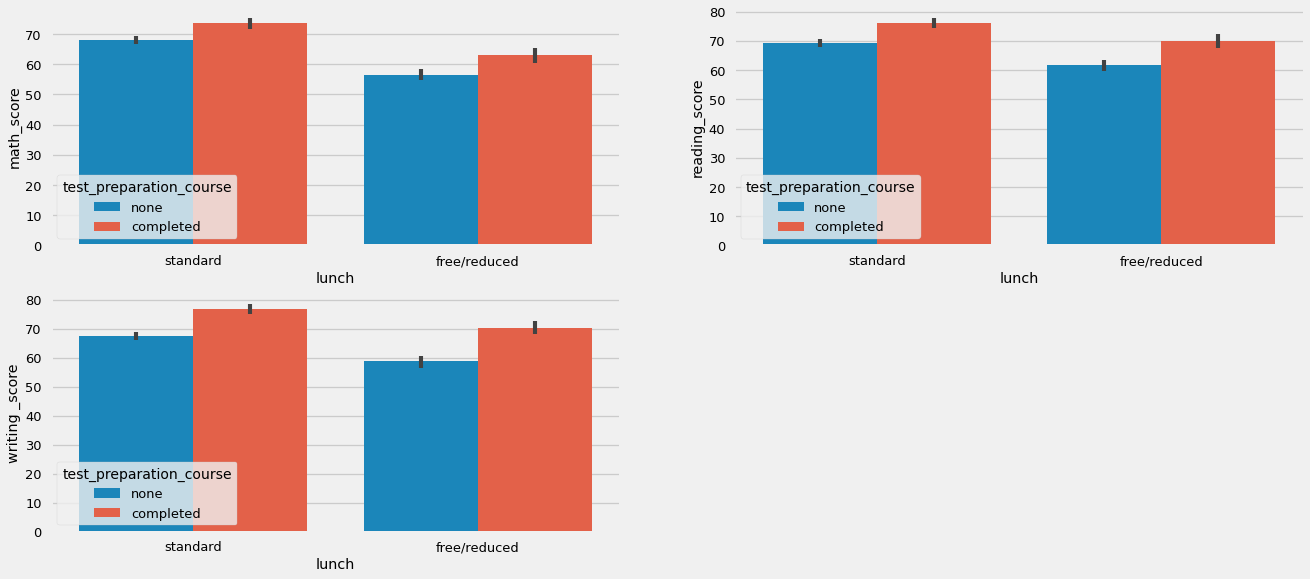

In [ ]:
plt.figure(figsize=(20,9))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'],y=df['math_score'],hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'],y=df['reading_score'],hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'],y=df['writing _score'],hue=df['test_preparation_course'])

#### Insights

 * Students who have completed a test preparation course tend to score higher in all three subject categories compared to          students who have not taken the course.

### 4.4.6 CHECKING OUTLIERS

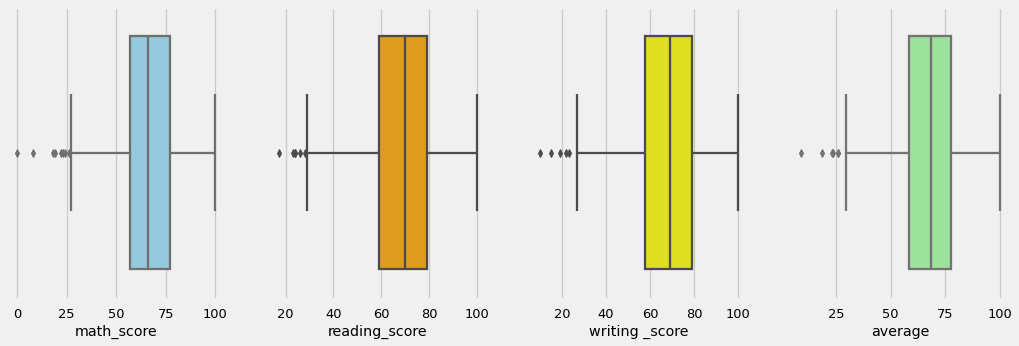

In [ ]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='orange')
plt.subplot(143)
sns.boxplot(df['writing _score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

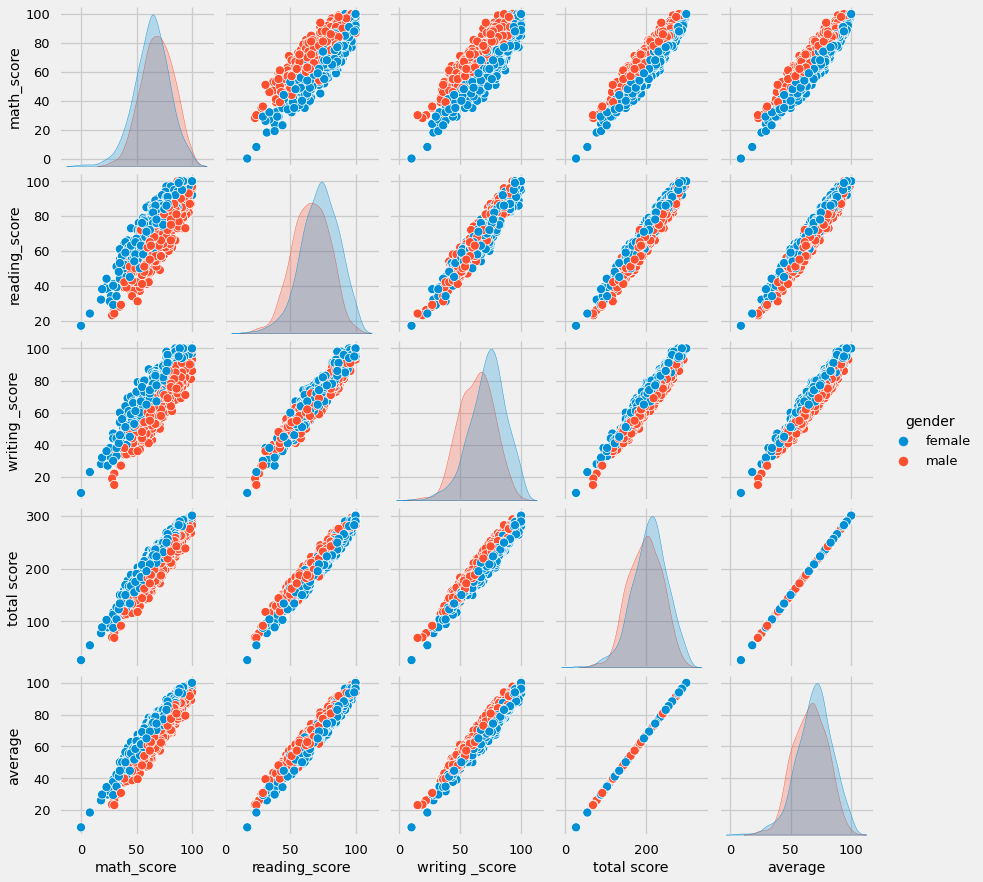

In [ ]:
sns.pairplot(df,hue='gender')
plt.show()

#### Insights

 * It is evident from the above plot that all scores show a positive linear relationship with each other.

## Conclusions

 * The student's performance is significantly influenced by factors such as lunch type, ethnicity, and parental level of            education.
 * Female students not only have a higher pass percentage but also tend to be among the top scorers.
 * The impact of test preparation courses on student performance seems to be relatively low.
 * Completing a test preparation course has proven to be beneficial for student performance.